In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

In [3]:
file_name1 = dir_origen_csv + "Data_filt_horas_ceros.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df["fecha"] =  pd.to_datetime(df["fecha"]) #transforming "fecha" to datetime

In [4]:
df['dayNumber'] = df['fecha'].dt.dayofweek
df

,medidor,fecha,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,kwh_consumido,kvarh_consumido,tipo_consumo,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth,hora,dayNumber
0,15029828,2019-04-04 09:01:02,1143130,114.6726,114.8017,115.2943,2.0728,0.8169,0.9463,A3,...,26.4075,0.0000,medio,3,0,0,13.201916,14,9,3
1,15029828,2019-04-04 11:00:58,1143509,114.6649,114.8677,114.8779,1.9875,0.3203,0.6920,A3,...,158.3400,0.0000,medio,3,0,0,79.214008,14,11,3
2,15029828,2019-04-04 13:00:59,1143880,114.8444,115.3403,115.6252,1.9815,0.8929,0.8766,A3,...,382.2525,0.0000,medio,3,0,0,191.099708,14,13,3
3,15029828,2019-04-04 15:01:02,1144272,114.6778,114.8357,114.4145,1.9633,0.9327,0.9178,A3,...,428.7150,0.0000,medio,3,0,0,214.268222,14,15,3
4,15029828,2019-04-04 17:01:02,1144628,116.9224,117.2767,117.0052,2.6013,0.4311,1.2383,A3,...,413.5950,0.0000,medio,3,0,0,206.797500,14,17,3
5,15029828,2019-04-04 19:01:02,1145053,114.1925,114.8132,115.2102,2.5062,0.4349,1.2263,A3,...,15.0150,0.0000,medio,3,0,0,7.507500,14,19,3
6,15029828,2019-04-05 09:01:03,1148042,116.4599,116.4413,116.5216,2.6279,0.4364,1.2431,A3,...,35.2275,0.0000,medio,3,0,0,8.806263,14,9,4
7,15029828,2019-04-05 13:08:58,1149035,114.3455,114.0721,113.9389,2.5562,0.4378,1.2162,A3,...,23.5200,0.0000,medio,3,0,0,5.692235,14,13,4
8,15029828,2019-04-05 15:40:19,1149560,117.0340,116.8882,117.2858,2.5909,0.3984,1.2069,A3,...,62.3175,0.0000,medio,3,0,0,24.704658,14,15,4
9,15029828,2019-04-05 17:40:18,1149951,117.3378,117.1492,117.3656,2.6382,0.4353,1.2445,A3,...,19.5300,0.0000,medio,3,0,0,9.766356,14,17,4


In [6]:
df['Lunes']= df.loc[df['dayNumber']==0 ,:]['kwh_consumido'] 
df['Martes']= df.loc[df['dayNumber']==1 ,:]['kwh_consumido'] 
df['Miercoles']= df.loc[df['dayNumber']==2 ,:]['kwh_consumido']
df['Jueves']= df.loc[df['dayNumber']==3 ,:]['kwh_consumido'] 
df['Viernes']= df.loc[df['dayNumber']==4 ,:]['kwh_consumido'] 
df['Sabado']= df.loc[df['dayNumber']==5 ,:]['kwh_consumido'] 
df['Domingo']= df.loc[df['dayNumber']==6 ,:]['kwh_consumido'] 
df[['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']]

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo
0,NaN,NaN,NaN,26.4075,NaN,NaN,NaN
1,NaN,NaN,NaN,158.3400,NaN,NaN,NaN
2,NaN,NaN,NaN,382.2525,NaN,NaN,NaN
3,NaN,NaN,NaN,428.7150,NaN,NaN,NaN
4,NaN,NaN,NaN,413.5950,NaN,NaN,NaN
5,NaN,NaN,NaN,15.0150,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,35.2275,NaN,NaN
7,NaN,NaN,NaN,NaN,23.5200,NaN,NaN
8,NaN,NaN,NaN,NaN,62.3175,NaN,NaN
9,NaN,NaN,NaN,NaN,19.5300,NaN,NaN


In [7]:
df_medidor_dias = df[['medidor','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']].groupby('medidor').mean()
df_medidor_dias

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo
medidor,,,,,,,
15029828,198.928676,287.332500,382.685305,276.428372,125.964620,50.922813,28.099050
15029835,0.542094,3.614812,2.354298,1.312811,0.744750,5.685333,9.976500
15029844,4.723385,4.523872,4.653261,4.823321,5.561455,5.700360,7.851923
15029846,337.680000,340.956321,334.653047,340.596083,339.533632,363.703543,335.158811
15029847,34.956692,38.433574,34.696851,38.110824,26.875925,12.635755,12.994941
15029974,1.575745,0.849795,0.682215,0.568246,0.533154,0.763593,1.047547
15029977,35.087737,34.617900,35.462872,34.985167,31.740643,34.267588,27.280684
15842884,22.357374,23.449680,23.300489,19.656730,21.373427,19.350909,17.896085
15842885,12.089649,12.749234,10.251121,11.822913,9.090532,4.855500,1.551141


### Clusters

k: 1  cost: 9819536.01466091
k: 2  cost: 3568150.367549707
k: 3  cost: 1654227.02330806
k: 4  cost: 983272.5310889333
k: 5  cost: 682657.9454753695
k: 6  cost: 462328.8810608461
k: 7  cost: 326693.16292697797
k: 8  cost: 241900.46495864846
k: 9  cost: 185706.30801007323


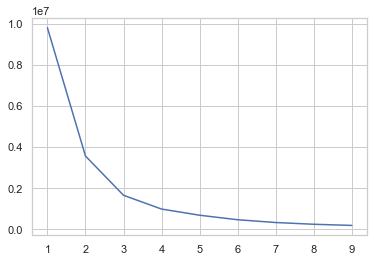

In [8]:
from sklearn.cluster import KMeans
 
A=df_medidor_dias
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'random')
X=df_medidor_dias.iloc[:,0:2].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [21]:
kmeans.cluster_centers_

array([[457.20054811, 545.04513955],
       [ 34.58579912,  38.12445332]])

In [22]:
distance=kmeans.fit_transform(X)
distance

array([[2.98518395e+02, 3.64856361e+02],
       [4.84756552e+01, 7.08296366e+02],
       [4.49528958e+01, 7.04910508e+02],
       [4.28454472e+02, 2.36510903e+02],
       [4.82822574e-01, 6.59503716e+02],
       [4.97901981e+01, 7.09748219e+02],
       [3.54229554e+00, 6.62355790e+02],
       [1.91019200e+01, 6.79080562e+02],
       [3.39113332e+01, 6.93875092e+02],
       [1.65254262e+01, 6.76246766e+02],
       [3.33005856e+01, 6.93191416e+02],
       [1.69488400e+02, 5.29820120e+02],
       [5.10677874e+01, 7.11005605e+02],
       [5.13393372e+01, 7.11277006e+02],
       [3.73532980e+01, 6.97301297e+02],
       [3.54169816e+01, 6.95376387e+02],
       [5.11580496e+01, 7.11095099e+02],
       [5.06176611e+01, 7.10555817e+02],
       [5.05145795e+01, 7.10451581e+02],
       [5.01513162e+01, 7.10093064e+02],
       [5.10098508e+01, 7.10947863e+02],
       [5.09290949e+01, 7.10867537e+02],
       [5.09143001e+01, 7.10852872e+02],
       [5.09596224e+01, 7.10898005e+02],
       [5.111593

In [23]:
labels=kmeans.labels_
labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [25]:
df_promedio_dias = df_medidor_dias
df_promedio_dias['ClustersConsumoDias'] = labels
df_promedio_dias

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,ClustersConsumoDias
medidor,,,,,,,,
15029828,198.928676,287.332500,382.685305,276.428372,125.964620,50.922813,28.099050,0
15029835,0.542094,3.614812,2.354298,1.312811,0.744750,5.685333,9.976500,0
15029844,4.723385,4.523872,4.653261,4.823321,5.561455,5.700360,7.851923,0
15029846,337.680000,340.956321,334.653047,340.596083,339.533632,363.703543,335.158811,1
15029847,34.956692,38.433574,34.696851,38.110824,26.875925,12.635755,12.994941,0
15029974,1.575745,0.849795,0.682215,0.568246,0.533154,0.763593,1.047547,0
15029977,35.087737,34.617900,35.462872,34.985167,31.740643,34.267588,27.280684,0
15842884,22.357374,23.449680,23.300489,19.656730,21.373427,19.350909,17.896085,0
15842885,12.089649,12.749234,10.251121,11.822913,9.090532,4.855500,1.551141,0


In [26]:
grupo0 = df_promedio_dias.loc[df_promedio_dias['ClustersConsumoDias']==0,:]
grupo0

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,ClustersConsumoDias
medidor,,,,,,,,
15029828,198.928676,287.332500,382.685305,276.428372,125.964620,50.922813,28.099050,0
15029835,0.542094,3.614812,2.354298,1.312811,0.744750,5.685333,9.976500,0
15029844,4.723385,4.523872,4.653261,4.823321,5.561455,5.700360,7.851923,0
15029847,34.956692,38.433574,34.696851,38.110824,26.875925,12.635755,12.994941,0
15029974,1.575745,0.849795,0.682215,0.568246,0.533154,0.763593,1.047547,0
15029977,35.087737,34.617900,35.462872,34.985167,31.740643,34.267588,27.280684,0
15842884,22.357374,23.449680,23.300489,19.656730,21.373427,19.350909,17.896085,0
15842885,12.089649,12.749234,10.251121,11.822913,9.090532,4.855500,1.551141,0
15842894,26.431126,23.751179,21.333819,24.258565,22.621206,31.550757,3.437471,0


In [27]:
grupo1 = df_promedio_dias.loc[df_promedio_dias['ClustersConsumoDias']==1,:]
grupo1

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,ClustersConsumoDias
medidor,,,,,,,,
15029846,337.680000,340.956321,334.653047,340.596083,339.533632,363.703543,335.158811,1
52073201,304.887692,498.977829,430.100211,355.213314,408.213824,317.856348,51.684856,1
52073321,349.753980,383.818925,308.378942,365.700000,230.208739,75.258653,60.917631,1
53307830,433.550600,439.862250,429.407254,437.996323,356.544611,214.885070,202.445081,1
58706725,860.130469,1061.610373,1084.104550,1055.342497,788.346046,615.291350,318.164086,1


In [29]:
#grupo2 = df_promedio_dias.loc[df_promedio_dias['ClustersConsumoDias']==2,:]
#grupo2

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,ClustersConsumoDias
medidor,,,,,,,,


In [31]:
grupo0.to_csv(dir_origen_csv + "Cluster0_PromedioDias.csv", index= False)

In [32]:
grupo1.to_csv(dir_origen_csv + "Cluster1_PromedioDias.csv", index= False)

In [ ]:
#grupo2.to_csv(dir_export_csv + "Cluster2_PromedioDias.csv", index= False)